# Linear Regression

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [5]:
df = pd.read_csv('Air_quality_index.csv')

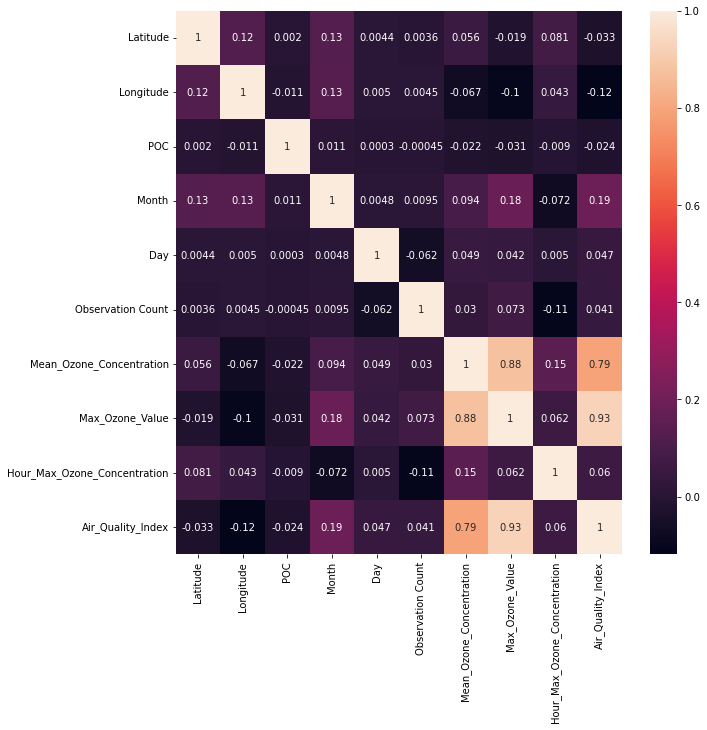

In [6]:
corrmap = df.corr()
top=corrmap.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top].corr(),annot=True)

In [7]:
# Transforming Categorical variables to Numerical

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1 = df.copy()
columns_to_encode = ["State Name", "County Name", "City Name","Event Type","AQI_Range"]
df1[columns_to_encode] = df1[columns_to_encode].apply(le.fit_transform)
df1.head(5)

,Latitude,Longitude,POC,State Name,County Name,City Name,Date Local,Month,Day,Event Type,Observation Count,Mean_Ozone_Concentration,Max_Ozone_Value,Hour_Max_Ozone_Concentration,Air_Quality_Index,AQI_Range
0,30.497478,-87.880258,1,0,23,202,2022-02-28,2,28,2,1,0.038000,0.038,14.0,35,0
1,30.497478,-87.880258,1,0,23,202,2022-03-01,3,1,2,17,0.037235,0.054,12.0,50,0
2,30.497478,-87.880258,1,0,23,202,2022-03-02,3,2,2,17,0.038235,0.055,12.0,51,1
3,30.497478,-87.880258,1,0,23,202,2022-03-03,3,3,2,9,0.024333,0.043,14.0,40,0
4,30.497478,-87.880258,1,0,23,202,2022-03-04,3,4,2,17,0.049647,0.063,10.0,77,1


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import scipy.stats as stats


Intercept: [-0.16052852]
Coefficient: [1216.68828569]
Correlation: 0.7916451454346639
Mean Squared Error: 89.28209230530858
RMSE TrainingData =  9.40506547205454
RMSE TestData =  9.4489201660988
--------------------------------------------------
RSquared value on train: 0.6244301064863491
RSquared value on test: 0.626625210764055
        Case   RunTime  RunSize  fitted.value   residual
0          1  0.060471      108     73.413829  34.586171
1          2  0.032706       48     39.632479   8.367521
2          3  0.031353       34     37.986299  -3.986299
3          4  0.027000       27     32.690055  -5.690055
4          5  0.044188       43     53.602493 -10.602493
...      ...       ...      ...           ...        ...
40197  40198  0.039059       37     47.362099 -10.362099
40198  40199  0.034059       40     41.278658  -1.278658
40199  40200  0.021647       30     26.177123   3.822877
40200  40201  0.031824       31     38.559359  -7.559359
40201  40202  0.045235       46     54.87

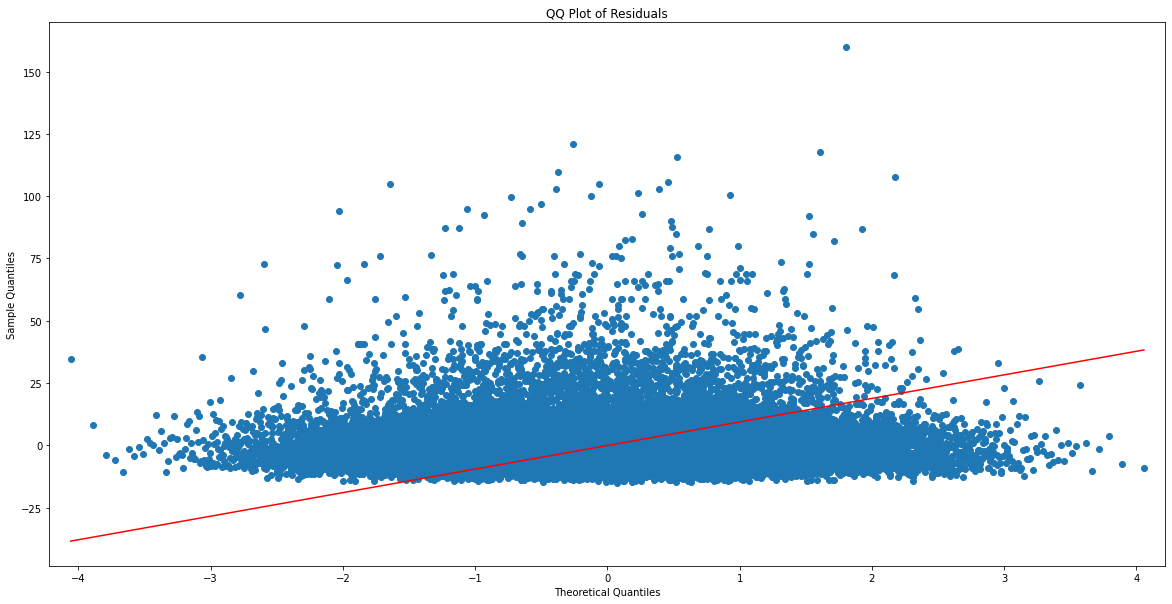

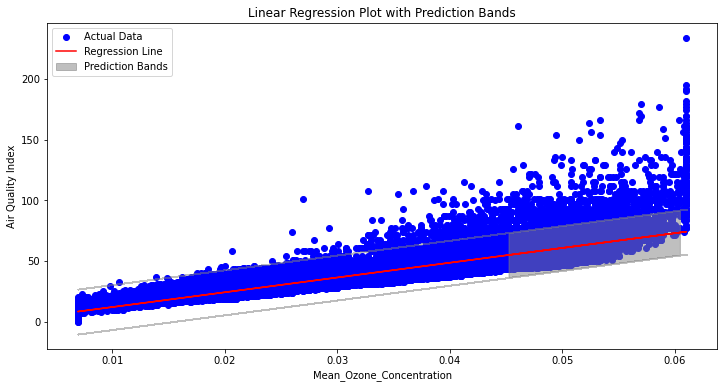

In [44]:
X = df1['Mean_Ozone_Concentration'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

residuals = Y_test - test_pred
# Calculate the standard error of the residuals
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
lower_bound = test_pred - prediction_interval

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)

RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

# Print the DataFrame with results
results_df = pd.DataFrame({
    'Case': range(1, len(Y_test) + 1),
    'RunTime': X_test.flatten(),
    'RunSize': Y_test.flatten(),
    'fitted.value': test_pred.flatten(),
    'residual': residuals.flatten()
})

print(results_df)

qq_plot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()  # Display the QQ plot

# Visualize the linear regression plot with prediction bands
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, test_pred, color='red', label='Regression Line')
plt.fill_between(X_test.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.5, label='Prediction Bands')
plt.title('Linear Regression Plot with Prediction Bands')
plt.xlabel('Mean_Ozone_Concentration')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()






Intercept: The intercept is approximately -0.161.

Coefficient: The coefficient for "Ozone Concentration" is approximately 1216.688.

Is it a predictive feature: The high positive coefficient of 1216.688 indicates that "Ozone Concentration" is a strong positive predictor of the Air Quality Index (AQI). An increase in "Ozone Concentration" is associated with a substantial increase in AQI.

Most predictive features according to the training data: Based on the coefficient magnitude, "Ozone Concentration" is one of the most predictive features according to the training data. It has a strong positive influence on AQI.

Residuals: The RMSE values for both the training and testing data are around 9.405 and 9.449, respectively. The R-squared values are relatively high, with 0.6244 for training and 0.6266 for testing data. These results suggest that the model explains a significant portion of the variance in AQI. The low RMSE and high R-squared values indicate a strong fit in predicting AQI based on "Ozone Concentration."

Prediction accuracy: The high R-squared values and low RMSE scores indicate a high degree of accuracy in predicting AQI based on "Ozone Concentration." The correlation between predicted and real values is strong, and the model's predictions closely align with actual AQI values.

In summary, the linear regression results for "Ozone Concentration" suggest that it is a highly predictive feature for AQI. The model demonstrates strong predictive power, as indicated by high R-squared values and low RMSE scores. "Ozone Concentration" is a significant and positive predictor for accurately predicting AQI.







Intercept: [32.84310527]
Coefficient: [0.4977679]
Correlation: 0.04264469275761219
Mean Squared Error: 238.6983202415963
RMSE TrainingData =  15.334135578852244
RMSE TestData =  15.449864732145596
--------------------------------------------------
RSquared value on train: 0.001643333473186681
RSquared value on test: 0.0017714335545321314
        Case  RunTime  RunSize  fitted.value   residual
0          1       17      108     41.305160  66.694840
1          2       17       48     41.305160   6.694840
2          3       17       34     41.305160  -7.305160
3          4       17       27     41.305160 -14.305160
4          5       16       43     40.807392   2.192608
...      ...      ...      ...           ...        ...
40197  40198       17       37     41.305160  -4.305160
40198  40199       17       40     41.305160  -1.305160
40199  40200       17       30     41.305160 -11.305160
40200  40201       17       31     41.305160 -10.305160
40201  40202       17       46     41.305160

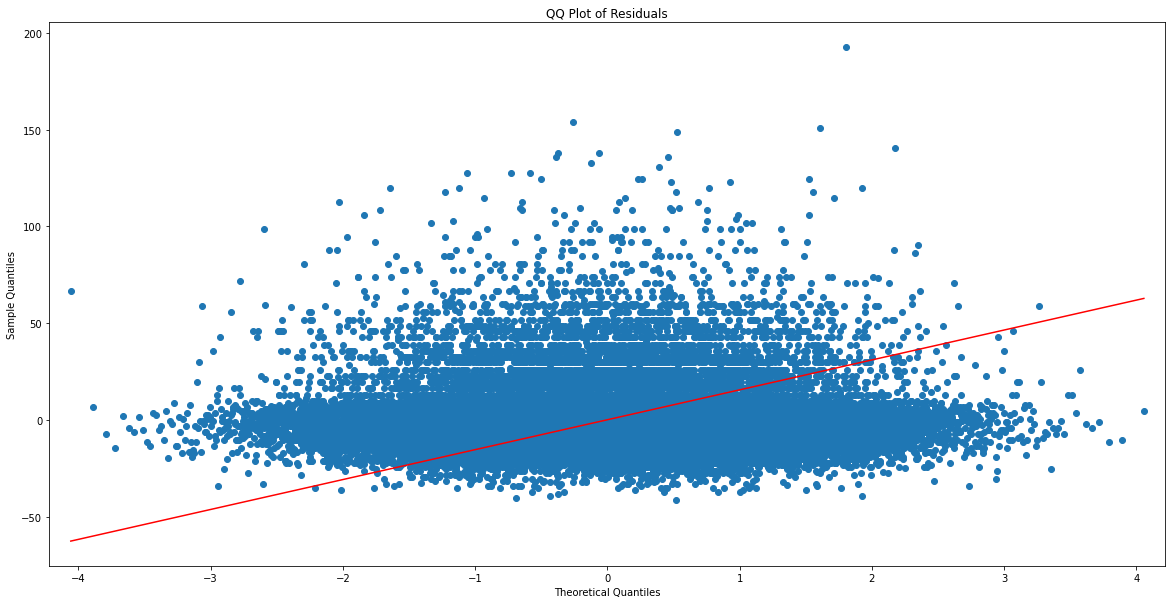

<Figure size 864x432 with 0 Axes>

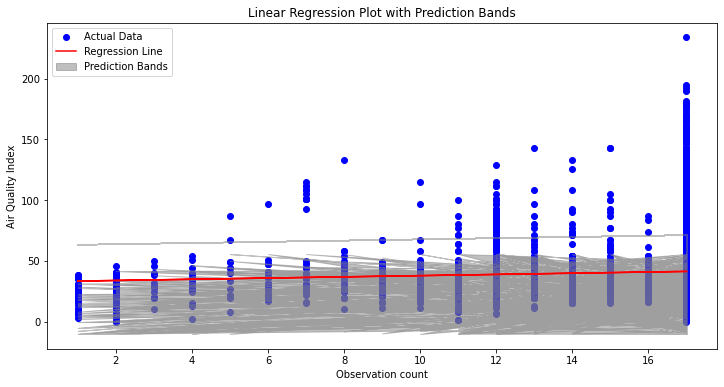

In [23]:
X = df1['Observation Count'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

# Compute residuals
residuals = Y_test - test_pred
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
results_df = pd.DataFrame({
    'Case': range(1, len(Y_test) + 1),
    'RunTime': X_test.flatten(),
    'RunSize': Y_test.flatten(),
    'fitted.value': test_pred.flatten(),
    'residual': residuals.flatten()
})


# Print the DataFrame
print(results_df)

qq_plot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()  # Display the QQ plot

# Visualize the linear regression plot
plt.figure(figsize=(12, 6))

# Visualize the linear regression plot with prediction bands
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, test_pred, color='red', label='Regression Line')
plt.fill_between(X_test.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.5, label='Prediction Bands')
plt.title('Linear Regression Plot with Prediction Bands')
plt.xlabel('Observation count')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()

Intercept: The intercept is approximately 32.843.

Coefficient: The coefficient for "Observation Count" is approximately 0.498.

Is it a predictive feature: The positive coefficient of 0.498 suggests that "Observation Count" has a positive but relatively weak impact on the Air Quality Index (AQI). The small coefficient implies that the increase in AQI associated with an increase in "Observation Count" is not substantial.

Most predictive features according to the training data: Based on the coefficient magnitude, "Observation Count" is not one of the most predictive features according to the training data. Other factors may have a stronger influence on AQI.

Residuals: The RMSE values for both the training and testing data are around 15.334 and 15.450, respectively. The R-squared values are quite low, with 0.0016 for training and 0.0018 for testing data. These results suggest that the model explains only a very small fraction of the variance in AQI. The low R-squared and RMSE values indicate limited accuracy in predicting AQI based on "Observation Count."

Prediction accuracy: The low R-squared values and RMSE scores indicate limited accuracy in predicting AQI based on "Observation Count." The correlation between predicted and real values is also quite low, suggesting that the model's predictions do not align closely with actual AQI values.

In summary, the linear regression results for "Observation Count" suggest that it has a weak and positive effect on AQI but is not a strong predictive feature. The model's performance indicates that "Observation Count" alone is not sufficient for accurately predicting AQI, and other factors should be considered to improve the model's predictive power.







Intercept: [42.87174351]
Coefficient: [-0.07266226]
Correlation: 0.07309200540110287
Mean Squared Error: 237.85345059271808
RMSE TrainingData =  15.305140338221172
RMSE TestData =  15.422498195581612
--------------------------------------------------
RSquared value on train: 0.0054153391665323625
RSquared value on test: 0.00530465078697584
        Case  RunTime  RunSize  fitted.value   residual
0          1       35      108     40.328564  67.671436
1          2       35       48     40.328564   7.671436
2          3       32       34     40.546551  -6.546551
3          4       35       27     40.328564 -13.328564
4          5       45       43     39.601942   3.398058
...      ...      ...      ...           ...        ...
40197  40198        2       37     42.726419  -5.726419
40198  40199       15       40     41.781810  -1.781810
40199  40200       20       30     41.418498 -11.418498
40200  40201       22       31     41.273174 -10.273174
40201  40202        5       46     42.5084

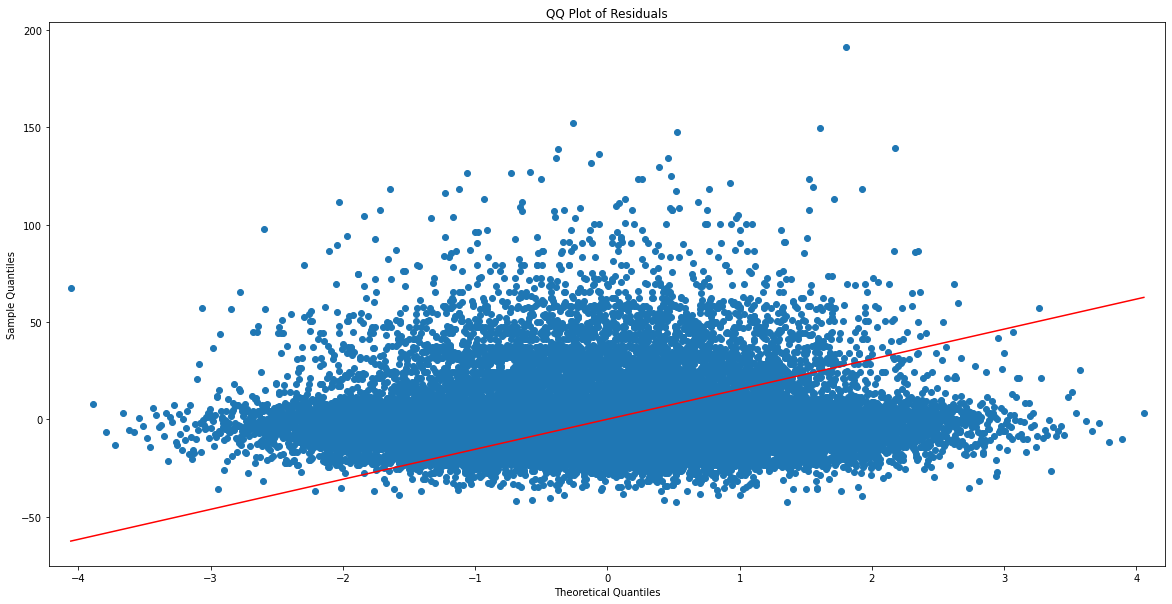

<Figure size 864x432 with 0 Axes>

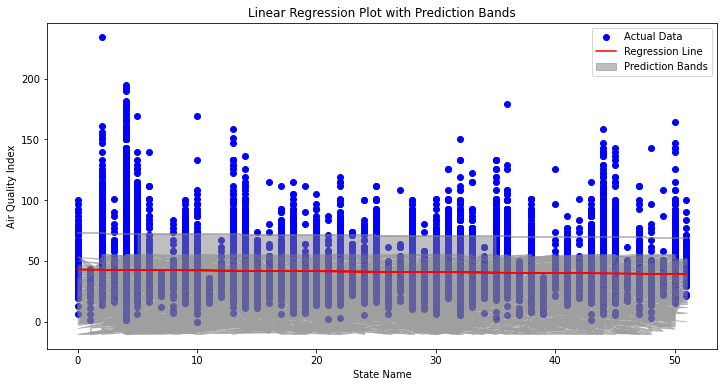

In [45]:
X = df1['State Name'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

# Compute residuals
residuals = Y_test - test_pred
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
results_df = pd.DataFrame({
    'Case': range(1, len(Y_test) + 1),
    'RunTime': X_test.flatten(),
    'RunSize': Y_test.flatten(),
    'fitted.value': test_pred.flatten(),
    'residual': residuals.flatten()
})


# Print the DataFrame
print(results_df)

qq_plot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()  # Display the QQ plot

# Visualize the linear regression plot
plt.figure(figsize=(12, 6))

# Visualize the linear regression plot with prediction bands
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, test_pred, color='red', label='Regression Line')
plt.fill_between(X_test.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.5, label='Prediction Bands')
plt.title('Linear Regression Plot with Prediction Bands')
plt.xlabel('State Name')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()

Intercept: The intercept is approximately 42.872.

Coefficient: The coefficient for "State" is approximately -0.073.

Is it a predictive feature: The small coefficient of -0.073 suggests that "State" has a very weak negative impact on the Air Quality Index (AQI). This implies that the choice of state does not have a substantial impact on AQI.

Most predictive features according to the training data: Based on the coefficient magnitude, "State" is not one of the most predictive features according to the training data. Other factors likely have a stronger influence on AQI.

Residuals: The RMSE values for both the training and testing data are around 15.305 and 15.422, respectively. The R-squared values are quite low, with 0.0054 for training and 0.0053 for testing data. These results suggest that the model explains only a very small fraction of the variance in AQI. The low R-squared and RMSE values indicate limited accuracy in predicting AQI based on "State."

Prediction accuracy: The low R-squared values and RMSE scores indicate limited accuracy in predicting AQI based on "State." The correlation between predicted and real values is also quite low, suggesting that the model's predictions do not align closely with actual AQI values.

In summary, the linear regression results for "State" suggest that it has a very weak and negative effect on AQI and is not a strong predictive feature. The model's performance indicates that "State" alone is not sufficient for accurately predicting AQI, and other factors should be considered to improve the model's predictive power.

Intercept: [35.17218588]
Coefficient: [1.30807298]
Correlation: 0.18759130167654475
Mean Squared Error: 230.7174646149532
RMSE TrainingData =  15.069600004022664
RMSE TestData =  15.18938657796796
--------------------------------------------------
RSquared value on train: 0.03579234647305962
RSquared value on test: 0.03514711069850507
        Case  RunTime  RunSize  fitted.value   residual
0          1        7      108     44.328697  63.671303
1          2        7       48     44.328697   3.671303
2          3        5       34     41.712551  -7.712551
3          4        3       27     39.096405 -12.096405
4          5        5       43     41.712551   1.287449
...      ...      ...      ...           ...        ...
40197  40198        4       37     40.404478  -3.404478
40198  40199        3       40     39.096405   0.903595
40199  40200        5       30     41.712551 -11.712551
40200  40201        1       31     36.480259  -5.480259
40201  40202        8       46     45.636770   

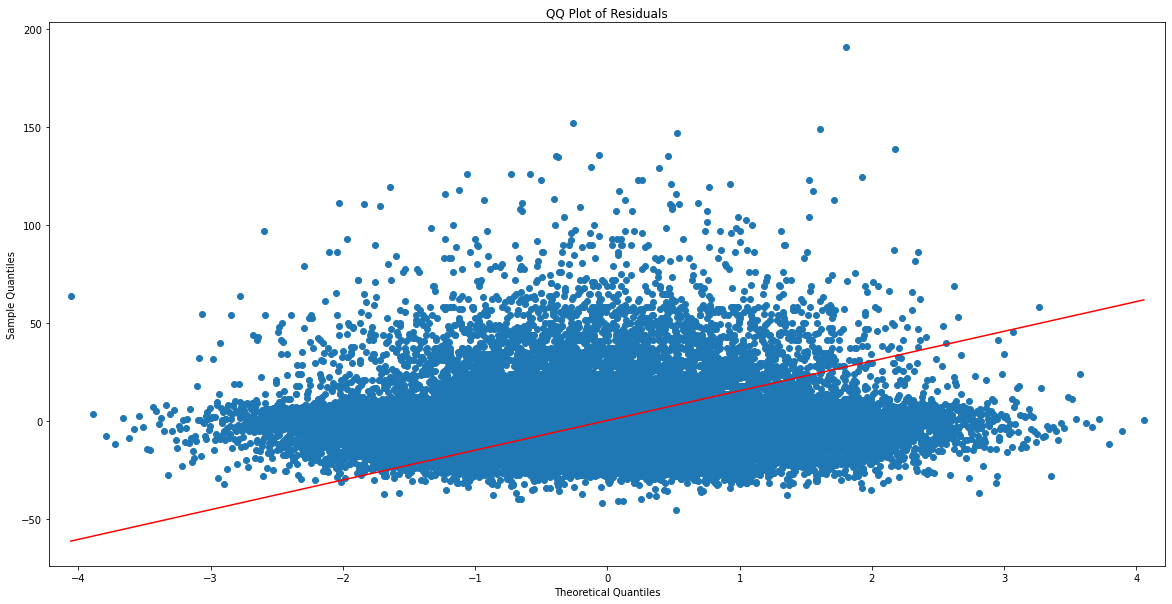

<Figure size 864x432 with 0 Axes>

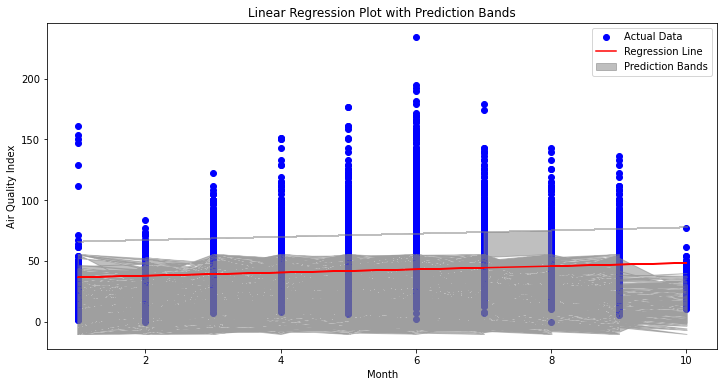

In [46]:
X = df1['Month'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

# Compute residuals
residuals = Y_test - test_pred
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
results_df = pd.DataFrame({
    'Case': range(1, len(Y_test) + 1),
    'RunTime': X_test.flatten(),
    'RunSize': Y_test.flatten(),
    'fitted.value': test_pred.flatten(),
    'residual': residuals.flatten()
})


# Print the DataFrame
print(results_df)

qq_plot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()  # Display the QQ plot

# Visualize the linear regression plot
plt.figure(figsize=(12, 6))

# Visualize the linear regression plot with prediction bands
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, test_pred, color='red', label='Regression Line')
plt.fill_between(X_test.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.5, label='Prediction Bands')
plt.title('Linear Regression Plot with Prediction Bands')
plt.xlabel('Month')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()

Intercept: The intercept is approximately 35.172.

Coefficient: The coefficient for "Month" is approximately 1.308.

Is it a predictive feature: The positive coefficient of 1.308 suggests that "Month" has a positive but relatively weak impact on the Air Quality Index (AQI). The small coefficient implies that the increase in AQI associated with an increase in "Month" is not substantial.

Most predictive features according to the training data: Based on the coefficient magnitude, "Month" is not one of the most predictive features according to the training data. Other factors may have a stronger influence on AQI.

Residuals: The RMSE values for both the training and testing data are around 15.070 and 15.189, respectively. The R-squared values are quite low, with 0.0358 for training and 0.0351 for testing data. These results suggest that the model explains only a small fraction of the variance in AQI. The low R-squared and RMSE values indicate limited accuracy in predicting AQI based on "Month."

Prediction accuracy: The low R-squared values and RMSE scores indicate limited accuracy in predicting AQI based on "Month." The correlation between predicted and real values is also quite low, suggesting that the model's predictions do not align closely with actual AQI values.

In summary, the linear regression results for "Month" suggest that it has a weak and positive effect on AQI but is not a strong predictive feature. The model's performance indicates that "Month" alone is not sufficient for accurately predicting AQI, and other factors should be considered to improve the model's predictive power.







Intercept: [35.90020973]
Coefficient: [0.51234326]
Correlation: 0.05598136430146294
Mean Squared Error: 238.38798133269825
RMSE TrainingData =  15.31793378938343
RMSE TestData =  15.439818047266563
--------------------------------------------------
RSquared value on train: 0.0037519126284282223
RSquared value on test: 0.0030692607190802024
        Case  RunTime  RunSize  fitted.value   residual
0          1     11.0      108     41.535986  66.464014
1          2     11.0       48     41.535986   6.464014
2          3     12.0       34     42.048329  -8.048329
3          4     14.0       27     43.073015 -16.073015
4          5     11.0       43     41.535986   1.464014
...      ...      ...      ...           ...        ...
40197  40198      9.0       37     40.511299  -3.511299
40198  40199     10.0       40     41.023642  -1.023642
40199  40200     11.0       30     41.535986 -11.535986
40200  40201     11.0       31     41.535986 -10.535986
40201  40202     11.0       46     41.5359

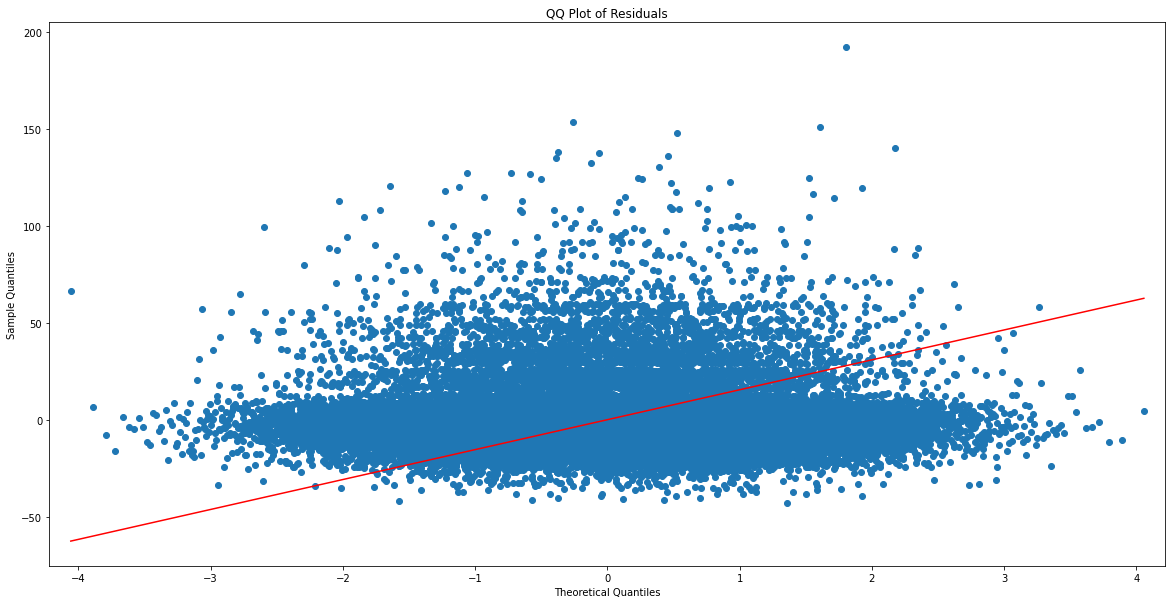

<Figure size 864x432 with 0 Axes>

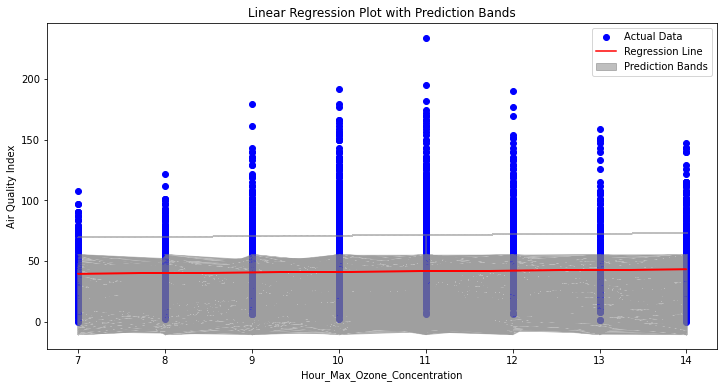

In [47]:
X = df1['Hour_Max_Ozone_Concentration'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

# Compute residuals
residuals = Y_test - test_pred
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
results_df = pd.DataFrame({
    'Case': range(1, len(Y_test) + 1),
    'RunTime': X_test.flatten(),
    'RunSize': Y_test.flatten(),
    'fitted.value': test_pred.flatten(),
    'residual': residuals.flatten()
})


# Print the DataFrame
print(results_df)

qq_plot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()  # Display the QQ plot

# Visualize the linear regression plot
plt.figure(figsize=(12, 6))

# Visualize the linear regression plot with prediction bands
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, test_pred, color='red', label='Regression Line')
plt.fill_between(X_test.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.5, label='Prediction Bands')
plt.title('Linear Regression Plot with Prediction Bands')
plt.xlabel('Hour_Max_Ozone_Concentration')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()

Intercept: The intercept is approximately 35.900.

Coefficient: The coefficient for "Hour_Max_Ozone Concentration" is approximately 0.512.

Is it a predictive feature: The positive coefficient of 0.512 suggests that "Hour_Max_Ozone Concentration" has a positive but relatively weak impact on the Air Quality Index (AQI). The small coefficient implies that the increase in AQI associated with an increase in "Hour_Max_Ozone Concentration" is not substantial.

Most predictive features according to the training data: Based on the coefficient magnitude, "Hour_Max_Ozone Concentration" is not one of the most predictive features according to the training data. Other factors may have a stronger influence on AQI.

Residuals: The RMSE values for both the training and testing data are around 15.318 and 15.440, respectively. The R-squared values are quite low, with 0.0038 for training and 0.0031 for testing data. These results suggest that the model explains only a very small fraction of the variance in AQI. The low R-squared and RMSE values indicate limited accuracy in predicting AQI based on "Hour_Max_Ozone Concentration."

Prediction accuracy: The low R-squared values and RMSE scores indicate limited accuracy in predicting AQI based on "Hour_Max_Ozone Concentration." The correlation between predicted and real values is also quite low, suggesting that the model's predictions do not align closely with actual AQI values.

In summary, the linear regression results for "Hour_Max_Ozone Concentration" suggest that it has a weak and positive effect on AQI but is not a strong predictive feature. The model's performance indicates that "Hour_Max_Ozone Concentration" alone is not sufficient for accurately predicting AQI, and other factors should be considered to improve the model's predictive power.

Intercept: [-13.91253448]
Coefficient: [1296.09263764]
Correlation: 0.9280285521628417
Mean Squared Error: 33.19450808978418
RMSE TrainingData =  5.712819255387759
RMSE TestData =  5.761467529179018
--------------------------------------------------
RSquared value on train: 0.8614303588053738
RSquared value on test: 0.8611816530975596
        Case  RunTime  RunSize  fitted.value   residual
0          1    0.073      108     80.702228  27.297772
1          2    0.052       48     53.484283  -5.484283
2          3    0.037       34     34.042893  -0.042893
3          4    0.029       27     23.674152   3.325848
4          5    0.046       43     45.707727  -2.707727
...      ...      ...      ...           ...        ...
40197  40198    0.040       37     37.931171  -0.931171
40198  40199    0.043       40     41.819449  -1.819449
40199  40200    0.032       30     27.562430   2.437570
40200  40201    0.033       31     28.858523   2.141477
40201  40202    0.050       46     50.892097  -

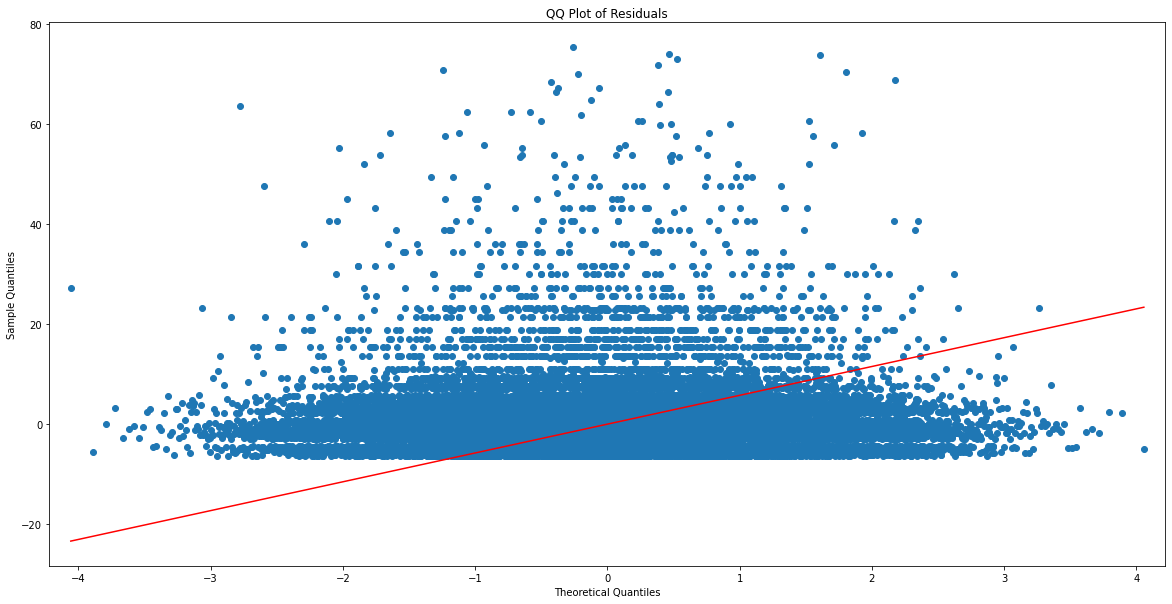

<Figure size 864x432 with 0 Axes>

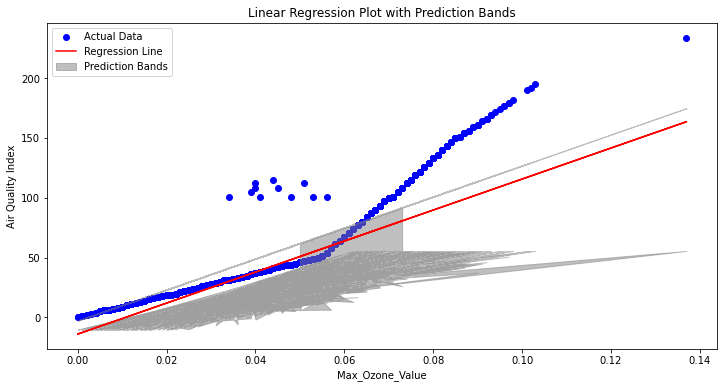

In [48]:
X = df1['Max_Ozone_Value'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

# Compute residuals
residuals = Y_test - test_pred
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
results_df = pd.DataFrame({
    'Case': range(1, len(Y_test) + 1),
    'RunTime': X_test.flatten(),
    'RunSize': Y_test.flatten(),
    'fitted.value': test_pred.flatten(),
    'residual': residuals.flatten()
})


# Print the DataFrame
print(results_df)

qq_plot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()  # Display the QQ plot

# Visualize the linear regression plot
plt.figure(figsize=(12, 6))

# Visualize the linear regression plot with prediction bands
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, test_pred, color='red', label='Regression Line')
plt.fill_between(X_test.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.5, label='Prediction Bands')
plt.title('Linear Regression Plot with Prediction Bands')
plt.xlabel('Max_Ozone_Value')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()

Intercept: The intercept is approximately -13.913.

Coefficient: The coefficient for "Max Ozone Value" is approximately 1296.093.

Is it a predictive feature: The positive coefficient of 1296.093 suggests that "Max Ozone Value" has a strong positive impact on the Air Quality Index (AQI). This means that as the maximum ozone value increases, the AQI is expected to increase significantly.

"Max Ozone Value" is one of the most predictive features according to the training data, given its high positive coefficient.

Residuals: The RMSE values for both the training and testing data are approximately 5.713 and 5.761, respectively. The R-squared values are relatively high, with 0.8614 for training and 0.8612 for testing data. These values indicate that the model explains a significant portion of the variance in AQI. The low RMSE and high R-squared values suggest that the linear regression model is a strong fit for predicting AQI based on "Max Ozone Value."

Prediction accuracy: The high R-squared values and low RMSE scores indicate a high degree of accuracy in predicting AQI based on "Max Ozone Value." The correlation between predicted and real values is strong, and the model's predictions closely align with actual AQI values.

In summary, the linear regression results for "Max Ozone Value" suggest that it is a highly predictive feature for AQI. The model demonstrates strong predictive power, as indicated by high R-squared values and low RMSE scores. "Max Ozone Value" is a significant factor in accurately predicting AQI.

Intercept: [64.82994896]
Coefficient: [-11.90288066]
Correlation: 0.0795238180069975
Mean Squared Error: 237.70771396192504
RMSE TrainingData =  15.273011123361313
RMSE TestData =  15.417772665399015
--------------------------------------------------
RSquared value on train: 0.009586706780547072
RSquared value on test: 0.005914116609307185
        Case  RunTime  RunSize  fitted.value   residual
0          1        2      108     41.024188  66.975812
1          2        2       48     41.024188   6.975812
2          3        2       34     41.024188  -7.024188
3          4        2       27     41.024188 -14.024188
4          5        2       43     41.024188   1.975812
...      ...      ...      ...           ...        ...
40197  40198        2       37     41.024188  -4.024188
40198  40199        2       40     41.024188  -1.024188
40199  40200        2       30     41.024188 -11.024188
40200  40201        2       31     41.024188 -10.024188
40201  40202        2       46     41.0241

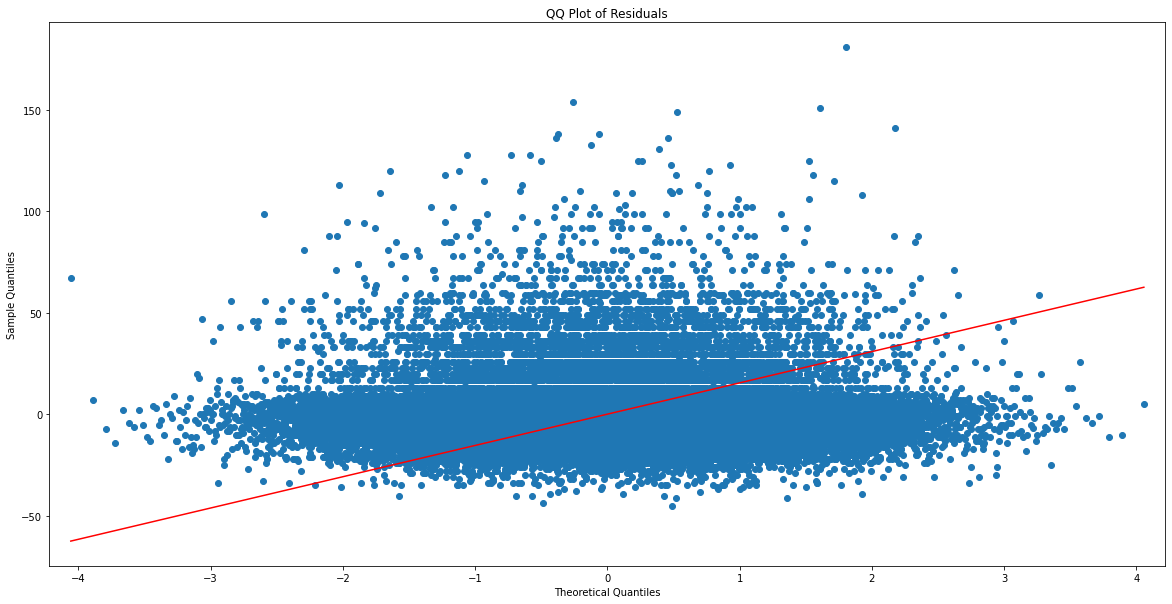

<Figure size 864x432 with 0 Axes>

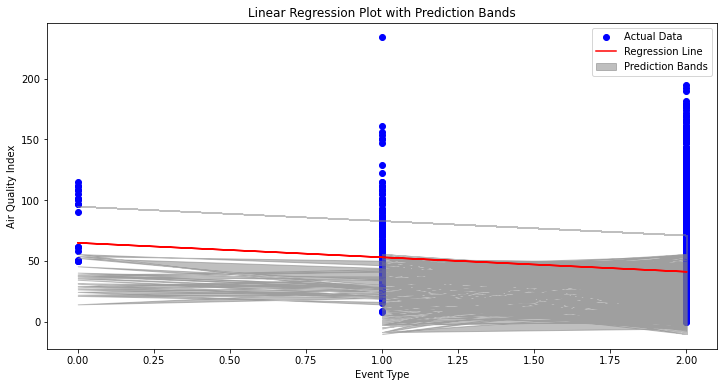

In [49]:
X = df1['Event Type'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

# Compute residuals
residuals = Y_test - test_pred
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
results_df = pd.DataFrame({
    'Case': range(1, len(Y_test) + 1),
    'RunTime': X_test.flatten(),
    'RunSize': Y_test.flatten(),
    'fitted.value': test_pred.flatten(),
    'residual': residuals.flatten()
})


# Print the DataFrame
print(results_df)

qq_plot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()  # Display the QQ plot

# Visualize the linear regression plot
plt.figure(figsize=(12, 6))

# Visualize the linear regression plot with prediction bands
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, test_pred, color='red', label='Regression Line')
plt.fill_between(X_test.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.5, label='Prediction Bands')
plt.title('Linear Regression Plot with Prediction Bands')
plt.xlabel('Event Type')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()

Intercept: The intercept is approximately 64.830.

Coefficient: The coefficient for "Event Type" is approximately -11.903.

Is it a predictive feature: The negative coefficient suggests that "Event Type" has a negative impact on the Air Quality Index (AQI). However, the magnitude of the coefficient is relatively small, indicating a weak predictive effect.

Most predictive features according to the training data: Based on the coefficient magnitude, "Event Type" is not one of the most predictive features according to the training data. Other factors may have a stronger influence on AQI.

Residuals: The RMSE values for both the training and testing data are around 15.273 and 15.418, respectively. The R-squared values are quite low (0.0096 for training and 0.0059 for testing), indicating that the model explains only a small fraction of the variance in AQI. These results suggest that the linear regression model might not be a strong fit for predicting AQI based solely on "Event Type." Other factors not included in the model likely contribute to AQI variations.

Prediction accuracy: The low R-squared values and RMSE scores indicate limited accuracy in predicting AQI based on "Event Type." The correlation between predicted and real values is also quite low, suggesting that the model's predictions do not align closely with actual AQI values.

In summary, the linear regression results for "Event Type" suggest that it has a weak and negative effect on AQI, but it is not a strong predictive feature. The model's performance indicates that "Event Type" alone is not sufficient for accurately predicting AQI, and other factors should be considered to improve the model's predictive power.







Intercept: [42.33172998]
Coefficient: [-1.03265806]
Correlation: 0.024130574672882783
Mean Squared Error: 238.9920588960213
RMSE TrainingData =  15.34213689599221
RMSE TestData =  15.459367997949375
--------------------------------------------------
RSquared value on train: 0.000601181162658504
RSquared value on test: 0.0005430281111276081
        Case  RunTime  RunSize  fitted.value   residual
0          1        1      108     41.299072  66.700928
1          2        1       48     41.299072   6.700928
2          3        1       34     41.299072  -7.299072
3          4        1       27     41.299072 -14.299072
4          5        1       43     41.299072   1.700928
...      ...      ...      ...           ...        ...
40197  40198        1       37     41.299072  -4.299072
40198  40199        1       40     41.299072  -1.299072
40199  40200        1       30     41.299072 -11.299072
40200  40201        1       31     41.299072 -10.299072
40201  40202        1       46     41.2990

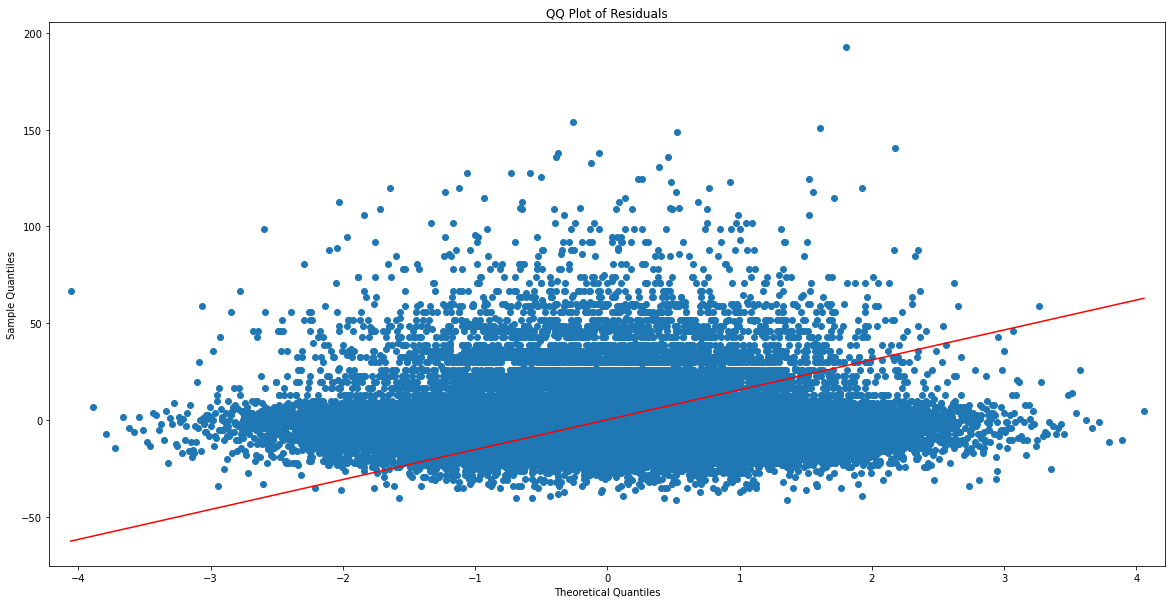

<Figure size 864x432 with 0 Axes>

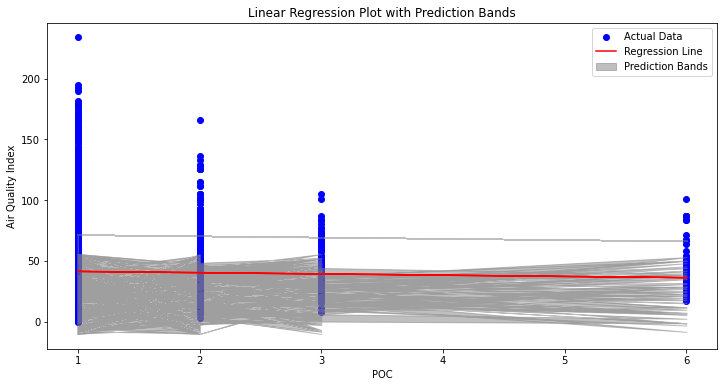

In [50]:
X = df1['POC'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

# Compute residuals
residuals = Y_test - test_pred
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
results_df = pd.DataFrame({
    'Case': range(1, len(Y_test) + 1),
    'RunTime': X_test.flatten(),
    'RunSize': Y_test.flatten(),
    'fitted.value': test_pred.flatten(),
    'residual': residuals.flatten()
})


# Print the DataFrame
print(results_df)

qq_plot = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()  # Display the QQ plot

# Visualize the linear regression plot
plt.figure(figsize=(12, 6))

# Visualize the linear regression plot with prediction bands
plt.figure(figsize=(12, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, test_pred, color='red', label='Regression Line')
plt.fill_between(X_test.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='gray', alpha=0.5, label='Prediction Bands')
plt.title('Linear Regression Plot with Prediction Bands')
plt.xlabel('POC')
plt.ylabel('Air Quality Index')
plt.legend()
plt.show()

Intercept: The intercept is approximately 42.332.

Coefficient: The coefficient for "POC" is approximately -1.033.

Is it a predictive feature: The coefficient of -1.033 indicates that "POC" has a negative impact on the Air Quality Index (AQI). However, the magnitude of the coefficient is relatively small, suggesting that "POC" has a weak negative influence on AQI.

Most predictive features according to the training data: Based on the coefficient magnitude, "POC" is not one of the most predictive features according to the training data. Other factors may have a stronger influence on AQI.

Residuals: The RMSE values for both the training and testing data are around 15.342 and 15.459, respectively. The R-squared values are very low, with 0.0006 for training and 0.0005 for testing data. These results suggest that the model explains an extremely small fraction of the variance in AQI. The low R-squared and RMSE values indicate limited accuracy in predicting AQI based on "POC."

Prediction accuracy: The very low R-squared values and RMSE scores indicate extremely limited accuracy in predicting AQI based on "POC." The correlation between predicted and real values is also very low, suggesting that the model's predictions do not align closely with actual AQI values.

In summary, the linear regression results for "POC" suggest that it has a very weak and negative effect on AQI and is not a strong predictive feature. The model's performance indicates that "POC" alone is not sufficient for accurately predicting AQI, and other factors should be considered to improve the model's predictive power.

# Inference 

The most predictive features for Air Quality Index (AQI) in the training data are "Max Ozone Value" and "Ozone Concentration" due to their high positive coefficients, has a high correlation of 0.9280 and strong predictive power. However, the residuals and low R-squared values across features indicate that linear regression alone may not be the best method for predicting AQI, as it does not explain a significant portion of the AQI variance.

# Multivariate Linear Regression

In [9]:
X = df1[['Mean_Ozone_Concentration','State Name','POC']]
Y = df1['Air_Quality_Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Intercept: 1.4411210845342524
Coefficient: [ 1.21493354e+03 -5.87183225e-02 -1.76965871e-01]
Correlation: 0.7939993911257509
most_predictive_feature: Mean_Ozone_Concentration
Mean Squared Error: 88.39053537121801
RMSE TrainingData =  9.360150601660665
RMSE TestData =  9.401624081573248
--------------------------------------------------
RSquared value on train: 0.6280086874303688
RSquared value on test: 0.6303536726959235


In [10]:
X = df1[['Mean_Ozone_Concentration','Month','Hour_Max_Ozone_Concentration', 'Day']]
Y = df1['Air_Quality_Index']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))


Intercept: 0.31628567387249973
Coefficient: [ 1.21058424e+03  7.73465438e-01 -3.92263129e-01  1.42941878e-02]
Correlation: 0.800825135595055
most_predictive_feature: Mean_Ozone_Concentration
Mean Squared Error: 85.78159932458279
RMSE TrainingData =  9.208474521306922
RMSE TestData =  9.261835634720732
--------------------------------------------------
RSquared value on train: 0.6399668366958569
RSquared value on test: 0.6412641578939118


In [11]:
from sklearn.linear_model import Lasso
X = df1[['Mean_Ozone_Concentration','Event Type','Month','Day']]
Y = df1['Air_Quality_Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)


model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Intercept: 7.631778510725908
Coefficient: [ 1.19475149e+03 -5.52212250e+00  7.99809977e-01  1.44668987e-02]
Correlation: 0.7998621145810126
most_predictive_feature: Mean_Ozone_Concentration
Mean Squared Error: 86.14830626365124
RMSE TrainingData =  9.209499346582035
RMSE TestData =  9.281611188993603
--------------------------------------------------
RSquared value on train: 0.6398866949489346
RSquared value on test: 0.6397306014712213


In [12]:
X = df1[['Month','Day','Event Type','Hour_Max_Ozone_Concentration','Max_Ozone_Value']]
Y = df1['Air_Quality_Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Intercept: -5.4740677915063145
Coefficient: [ 1.24262141e-01  1.35321666e-02 -4.56862153e+00  2.08961801e-02
  1.28735287e+03]
Correlation: 0.9284957511927714
most_predictive_feature: Max_Ozone_Value
Mean Squared Error: 32.98603715222802
RMSE TrainingData =  5.675970899705802
RMSE TestData =  5.74334720805107
--------------------------------------------------
RSquared value on train: 0.8632121746981242
RSquared value on test: 0.8620534717384767


In [13]:
X = df1[['State Name','County Name','Mean_Ozone_Concentration']]
Y = df1['Air_Quality_Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Intercept: 0.8133129405464672
Coefficient: [-5.77036278e-02  1.53607511e-03  1.21487327e+03]
Correlation: 0.7941443491630468
most_predictive_feature: Mean_Ozone_Concentration
Mean Squared Error: 88.33571175597913
RMSE TrainingData =  9.357717677851852
RMSE TestData =  9.39870798333362
--------------------------------------------------
RSquared value on train: 0.6282020409223514
RSquared value on test: 0.6305829432613463


In [14]:
X = df1[['State Name','County Name','City Name','Max_Ozone_Value']]
Y = df1['Air_Quality_Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Intercept: -13.388836818690379
Coefficient: [-1.63393161e-02  5.41060239e-04 -6.37077581e-04  1.29461518e+03]
Correlation: 0.9282598082622706
most_predictive_feature: Max_Ozone_Value
Mean Squared Error: 33.09207626873018
RMSE TrainingData =  5.705530819980345
RMSE TestData =  5.75257127454586
--------------------------------------------------
RSquared value on train: 0.8617837085549381
RSquared value on test: 0.8616100196222407


In [15]:
X = df1[['State Name','County Name','City Name','Event Type','Hour_Max_Ozone_Concentration','POC','Month','Day','Mean_Ozone_Concentration','Max_Ozone_Value']]
Y = df1['Air_Quality_Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

model = LinearRegression()
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Intercept: -6.174969398445171
Coefficient: [-1.18644346e-02  6.06388098e-04 -5.01367717e-04 -4.50850387e+00
  1.01373501e-01  1.97152024e-01  9.08152149e-02  1.56116663e-02
 -1.55200292e+02  1.41015918e+03]
Correlation: 0.9300043730717682
most_predictive_feature: Max_Ozone_Value
Mean Squared Error: 32.31697396028526
RMSE TrainingData =  5.622616168663572
RMSE TestData =  5.6848020159267865
--------------------------------------------------
RSquared value on train: 0.865771728107977
RSquared value on test: 0.8648514721193694


# Regularization

In [21]:
from sklearn.linear_model import Ridge
X = df1[['State Name','County Name','City Name','Event Type','Hour_Max_Ozone_Concentration','POC','Month','Day','Mean_Ozone_Concentration','Max_Ozone_Value']]
Y = df1['Air_Quality_Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

alpha = 1.0  
model = Ridge(alpha=alpha)
model.fit(X_train, Y_train)

#model = LinearRegression()
#model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)

RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Intercept: -2.806809370559833
Coefficient: [-2.15240531e-02  8.57690154e-04 -5.63031085e-04 -4.60983138e+00
  2.12564268e-02  1.16383589e-01  2.27390956e-01  1.57645946e-02
  8.63847170e+01  1.15341016e+03]
Correlation: 0.9268170247916441
most_predictive_feature: Max_Ozone_Value
RMSE TrainingData =  5.772832816121168
RMSE TestData =  5.851279215535135
--------------------------------------------------
RSquared value on train: 0.8585036994508758
RSquared value on test: 0.8568200269565671


In [24]:
X = df1[['Month','Day','Event Type','Hour_Max_Ozone_Concentration','Max_Ozone_Value']]
Y = df1['Air_Quality_Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

alpha = 1.0  
model = Ridge(alpha=alpha)
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(Y_test, test_pred)[0, 1]
print('Correlation:', correlation)
most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
print('most_predictive_feature:',most_predictive_feature)
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Intercept: -2.6348827438413664
Coefficient: [ 1.86212914e-01  1.68107508e-02 -4.91309396e+00  5.08136637e-02
  1.22145657e+03]
Correlation: 0.9283733393023931
most_predictive_feature: Max_Ozone_Value
Mean Squared Error: 33.6577710095243
RMSE TrainingData =  5.719892451541412
RMSE TestData =  5.801531781307787
--------------------------------------------------
RSquared value on train: 0.8610870127367635
RSquared value on test: 0.8592443027224439


In [22]:
X = df1['Mean_Ozone_Concentration'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

alpha = 1.0  
model = Ridge(alpha=alpha)
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

residuals = Y_test - test_pred
# Calculate the standard error of the residuals
residual_std = np.std(residuals)
# Calculate the prediction bands (e.g., 95% prediction interval)
alpha = 0.05  # Significance level (e.g., for a 95% prediction interval)
# Calculate the t-value for the given significance level and degrees of freedom
t_value = stats.t.ppf(1 - alpha / 2, len(X_test) - 2)
# Calculate the prediction interval
prediction_interval = t_value * residual_std
# Calculate the upper and lower prediction bounds
upper_bound = test_pred + prediction_interval
lower_bound = test_pred - prediction_interval

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)

RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))



Intercept: [2.27608351]
Coefficient: [1145.01642016]
Correlation: 0.7916451454346642
Mean Squared Error: 89.9821698286968
RMSE TrainingData =  9.432157318126103
RMSE TestData =  9.485893201417397
--------------------------------------------------
RSquared value on train: 0.6222632876698091
RSquared value on test: 0.6236975094636639


In [23]:
X = df1['Max_Ozone_Value'].values.reshape(-1,1)
Y = df1['Air_Quality_Index'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

alpha = 1.0  
model = Ridge(alpha=alpha)
model.fit(X_train, Y_train)

# Get coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

print('Intercept:', intercept)
print('Coefficient:', coef)

#predicting train
train_pred = model.predict(X_train)
#predicting on test
test_pred = model.predict(X_test)

correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
print('Correlation:', correlation)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, test_pred)
print('Mean Squared Error:', mse)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(Y_test, test_pred)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))


Intercept: [-11.21365827]
Coefficient: [1232.6260108]
Correlation: 0.9280285521628426
Mean Squared Error: 33.840387315273986
RMSE TrainingData =  5.755240348319436
RMSE TestData =  5.817249119237888
--------------------------------------------------
RSquared value on train: 0.8593647935509903
RSquared value on test: 0.85848060730593


When adding regularization in both unary and multivariate linear regression models, we did not observe any improvement in the prediction results. We performed regularization with L2 (Ridge). The correlation and error values for both unary and multivariate variables remained largely unchanged. The absence of significant improvement can be attributed to various factors. One potential reason could be that our initial models were not overly complex or prone to overfitting, which is where regularization typically exerts its most significant influence. 
Tried regularization to all the unary and multivariate models but have shown only 4 , 2 for unary and 2 for multivariate models

# Different testing and traing sets

### Unary Linear regression

In [38]:
X = df1['Max_Ozone_Value'].values.reshape(-1, 1)
Y = df1['Air_Quality_Index'].values.reshape(-1, 1)

# Define the test sizes to loop through
test_sizes = [0.3, 0.35]

# Initialize variables to track differences and similarities
results = []

# Define the number of repetitions
num_repetitions = 5  # You can adjust this number

for test_size in test_sizes:
    test_size_results = {'Test Size': test_size, 'Runs': []}
    
    for _ in range(num_repetitions):
        # Split the data into training and testing sets with the current test size and constant random state
        random_state = 70
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

        # Create and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, Y_train)

        # Get coefficients and intercept
        coef = model.coef_[0]
        intercept = model.intercept_[0]

        # Predict on training and test sets
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Calculate correlation, RMSE, MSE, and R-squared values
        correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
        RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
        RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
        MSE_test = mean_squared_error(Y_test, test_pred)
        RSquared_train = model.score(X_train, Y_train)
        RSquared_test = model.score(X_test, Y_test)

        test_size_results['Runs'].append({
            'Intercept': intercept,
            'Coefficient': coef,
            'Correlation': correlation,
            'RMSE on training set': RMSE_train,
            'RMSE on test set': RMSE_test,
            'MSE on test set': MSE_test,
            'R-squared on training set': RSquared_train,
            'R-squared on test set': RSquared_test
        })

    results.append(test_size_results)

# Print the results
for result in results:
    print(f"Test Size: {result['Test Size']}")
    for i, run in enumerate(result['Runs']):
        print(f"Run {i + 1}")
        print('Intercept:', run['Intercept'])
        print('Coefficient:', run['Coefficient'])
        print("Correlation:", run['Correlation'])
        print('RMSE on training set:', run['RMSE on training set'])
        print('RMSE on test set:', run['RMSE on test set'])
        print("MSE on test set:", run['MSE on test set'])
        print("R-squared on training set:", run['R-squared on training set'])
        print("R-squared on test set:", run['R-squared on test set'])
        print('-' * 50)


Test Size: 0.3
Run 1
Intercept: -13.92627058688202
Coefficient: [1296.26909538]
Correlation: 0.9276121758579279
RMSE on training set: 5.701751275008503
RMSE on test set: 5.770887939096171
MSE on test set: 33.303147605605645
R-squared on training set: 0.8617895673826733
R-squared on test set: 0.8604407991711452
--------------------------------------------------
Run 2
Intercept: -13.92627058688202
Coefficient: [1296.26909538]
Correlation: 0.9276121758579279
RMSE on training set: 5.701751275008503
RMSE on test set: 5.770887939096171
MSE on test set: 33.303147605605645
R-squared on training set: 0.8617895673826733
R-squared on test set: 0.8604407991711452
--------------------------------------------------
Run 3
Intercept: -13.92627058688202
Coefficient: [1296.26909538]
Correlation: 0.9276121758579279
RMSE on training set: 5.701751275008503
RMSE on test set: 5.770887939096171
MSE on test set: 33.303147605605645
R-squared on training set: 0.8617895673826733
R-squared on test set: 0.860440799

In [39]:
X = df1['Mean_Ozone_Concentration'].values.reshape(-1, 1)
Y = df1['Air_Quality_Index'].values.reshape(-1, 1)

# Define the test sizes to loop through
test_sizes = [0.3, 0.35]

# Initialize variables to track differences and similarities
results = []

# Define the number of repetitions
num_repetitions = 5  # You can adjust this number

for test_size in test_sizes:
    test_size_results = {'Test Size': test_size, 'Runs': []}
    
    for _ in range(num_repetitions):
        # Split the data into training and testing sets with the current test size and constant random state
        random_state = 70
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

        # Create and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, Y_train)

        # Get coefficients and intercept
        coef = model.coef_[0]
        intercept = model.intercept_[0]

        # Predict on training and test sets
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Calculate correlation, RMSE, MSE, and R-squared values
        correlation = np.corrcoef(test_pred.flatten(), Y_test.flatten())[0, 1]
        RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
        RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
        MSE_test = mean_squared_error(Y_test, test_pred)
        RSquared_train = model.score(X_train, Y_train)
        RSquared_test = model.score(X_test, Y_test)

        test_size_results['Runs'].append({
            'Intercept': intercept,
            'Coefficient': coef,
            'Correlation': correlation,
            'RMSE on training set': RMSE_train,
            'RMSE on test set': RMSE_test,
            'MSE on test set': MSE_test,
            'R-squared on training set': RSquared_train,
            'R-squared on test set': RSquared_test
        })

    results.append(test_size_results)

# Print the results
for result in results:
    print(f"Test Size: {result['Test Size']}")
    for i, run in enumerate(result['Runs']):
        print(f"Run {i + 1}")
        print('Intercept:', run['Intercept'])
        print('Coefficient:', run['Coefficient'])
        print("Correlation:", run['Correlation'])
        print('RMSE on training set:', run['RMSE on training set'])
        print('RMSE on test set:', run['RMSE on test set'])
        print("MSE on test set:", run['MSE on test set'])
        print("R-squared on training set:", run['R-squared on training set'])
        print("R-squared on test set:", run['R-squared on test set'])
        print('-' * 50)


Test Size: 0.3
Run 1
Intercept: -0.15889222330649488
Coefficient: [1216.50912657]
Correlation: 0.7919471210881159
RMSE on training set: 9.40578009492986
RMSE on test set: 9.432677391947083
MSE on test set: 88.97540278054962
R-squared on training set: 0.6238908220891493
R-squared on test set: 0.6271422673756862
--------------------------------------------------
Run 2
Intercept: -0.15889222330649488
Coefficient: [1216.50912657]
Correlation: 0.7919471210881159
RMSE on training set: 9.40578009492986
RMSE on test set: 9.432677391947083
MSE on test set: 88.97540278054962
R-squared on training set: 0.6238908220891493
R-squared on test set: 0.6271422673756862
--------------------------------------------------
Run 3
Intercept: -0.15889222330649488
Coefficient: [1216.50912657]
Correlation: 0.7919471210881159
RMSE on training set: 9.40578009492986
RMSE on test set: 9.432677391947083
MSE on test set: 88.97540278054962
R-squared on training set: 0.6238908220891493
R-squared on test set: 0.627142267

In [41]:
X = df1[['State Name', 'County Name', 'City Name', 'Event Type', 'Hour_Max_Ozone_Concentration', 'POC', 'Month', 'Day', 'Mean_Ozone_Concentration', 'Max_Ozone_Value']]
Y = df1['Air_Quality_Index']

# Define the train-test split ratios to loop through
train_test_ratios = [(0.7, 0.3), (0.65, 0.35), (0.8, 0.2)]

# Initialize variables to track differences and similarities
results = []

# Define the number of repetitions
num_repetitions = 5  # You can adjust this number

for train_ratio, test_ratio in train_test_ratios:
    train_test_results = {'Train Ratio': train_ratio, 'Test Ratio': test_ratio, 'Runs': []}
    
    for _ in range(num_repetitions):
        # Split the data into training and testing sets with the current train-test ratios and a constant random state
        random_state = 70
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_ratio, train_size=train_ratio, random_state=random_state)

        # Create and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, Y_train)

        # Get coefficients and intercept
        coef = model.coef_
        intercept = model.intercept_

        # Predict on training and test sets
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Calculate correlation, RMSE, MSE, and R-squared values
        correlation = np.corrcoef(Y_test, test_pred)[0, 1]
        most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
        mse = mean_squared_error(Y_test, test_pred)
        RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
        RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
        RSquared_train = model.score(X_train, Y_train)
        RSquared_test = model.score(X_test, Y_test)

        train_test_results['Runs'].append({
            'Intercept': intercept,
            'Coefficient': coef,
            'Correlation': correlation,
            'Most Predictive Feature': most_predictive_feature,
            'MSE on test set': mse,
            'RMSE on training set': RMSE_train,
            'RMSE on test set': RMSE_test,
            'R-squared on training set': RSquared_train,
            'R-squared on test set': RSquared_test
        })

    results.append(train_test_results)

# Print the results
for result in results:
    print(f"Train Ratio: {result['Train Ratio']}, Test Ratio: {result['Test Ratio']}")
    for i, run in enumerate(result['Runs']):
        print(f"Run {i + 1}")
        print('Intercept:', run['Intercept'])
        print('Coefficient:', run['Coefficient'])
        print("Correlation:", run['Correlation'])
        print('Most Predictive Feature:', run['Most Predictive Feature'])
        print('MSE on test set:', run['MSE on test set'])
        print('RMSE on training set:', run['RMSE on training set'])
        print('RMSE on test set:', run['RMSE on test set'])
        print("R-squared on training set:", run['R-squared on training set'])
        print("R-squared on test set:", run['R-squared on test set'])
        print('-' * 50)


Train Ratio: 0.7, Test Ratio: 0.3
Run 1
Intercept: -6.561469159455143
Coefficient: [-1.20987580e-02  6.56046591e-04 -5.09445422e-04 -4.32165293e+00
  1.02047799e-01  1.96894411e-01  8.86196114e-02  1.54036555e-02
 -1.55429335e+02  1.41061834e+03]
Correlation: 0.9298453215678552
Most Predictive Feature: Max_Ozone_Value
MSE on test set: 32.31431186423631
RMSE on training set: 5.613622691194522
RMSE on test set: 5.684567869612985
R-squared on training set: 0.866029022020135
R-squared on test set: 0.8645845854417644
--------------------------------------------------
Run 2
Intercept: -6.561469159455143
Coefficient: [-1.20987580e-02  6.56046591e-04 -5.09445422e-04 -4.32165293e+00
  1.02047799e-01  1.96894411e-01  8.86196114e-02  1.54036555e-02
 -1.55429335e+02  1.41061834e+03]
Correlation: 0.9298453215678552
Most Predictive Feature: Max_Ozone_Value
MSE on test set: 32.31431186423631
RMSE on training set: 5.613622691194522
RMSE on test set: 5.684567869612985
R-squared on training set: 0.86602

In [43]:
X = df1[['Month', 'Day', 'Event Type', 'Hour_Max_Ozone_Concentration', 'Max_Ozone_Value']]
Y = df1['Air_Quality_Index']

# Define the train-test split ratios to loop through
train_test_ratios = [(0.7, 0.3), (0.65, 0.35), (0.8, 0.2)]

# Initialize variables to track differences and similarities
results = []

# Define the number of repetitions
num_repetitions = 5  # You can adjust this number

for train_ratio, test_ratio in train_test_ratios:
    train_test_results = {'Train Ratio': train_ratio, 'Test Ratio': test_ratio, 'Runs': []}
    
    for _ in range(num_repetitions):
        # Split the data into training and testing sets with the current train-test ratios and a constant random state
        random_state = 70
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_ratio, train_size=train_ratio, random_state=random_state)

        # Create and train the Linear Regression model
        model = LinearRegression()
        model.fit(X_train, Y_train)

        # Get coefficients and intercept
        coef = model.coef_
        intercept = model.intercept_

        # Predict on training and test sets
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        # Calculate correlation, RMSE, MSE, and R-squared values
        correlation = np.corrcoef(Y_test, test_pred)[0, 1]
        most_predictive_feature = X.columns[np.argmax(np.abs(coef))]
        mse = mean_squared_error(Y_test, test_pred)
        RMSE_train = np.sqrt(mean_squared_error(Y_train, train_pred))
        RMSE_test = np.sqrt(mean_squared_error(Y_test, test_pred))
        RSquared_train = model.score(X_train, Y_train)
        RSquared_test = model.score(X_test, Y_test)

        train_test_results['Runs'].append({
            'Intercept': intercept,
            'Coefficient': coef,
            'Correlation': correlation,
            'Most Predictive Feature': most_predictive_feature,
            'MSE on test set': mse,
            'RMSE on training set': RMSE_train,
            'RMSE on test set': RMSE_test,
            'R-squared on training set': RSquared_train,
            'R-squared on test set': RSquared_test
        })

    results.append(train_test_results)

# Print the results
for result in results:
    print(f"Train Ratio: {result['Train Ratio']}, Test Ratio: {result['Test Ratio']}")
    for i, run in enumerate(result['Runs']):
        print(f"Run {i + 1}")
        print('Intercept:', run['Intercept'])
        print('Coefficient:', run['Coefficient'])
        print("Correlation:", run['Correlation'])
        print('Most Predictive Feature:', run['Most Predictive Feature'])
        print('MSE on test set:', run['MSE on test set'])
        print('RMSE on training set:', run['RMSE on training set'])
        print('RMSE on test set:', run['RMSE on test set'])
        print("R-squared on training set:", run['R-squared on training set'])
        print("R-squared on test set:", run['R-squared on test set'])
        print('-' * 50)


Train Ratio: 0.7, Test Ratio: 0.3
Run 1
Intercept: -5.851918333458201
Coefficient: [ 1.22300618e-01  1.34127237e-02 -4.38529008e+00  2.12205439e-02
  1.28771809e+03]
Correlation: 0.9284159251531857
Most Predictive Feature: Max_Ozone_Value
MSE on test set: 32.94720603879382
RMSE on training set: 5.667578589296954
RMSE on test set: 5.739965682719177
R-squared on training set: 0.8634412943867336
R-squared on test set: 0.8619323975387922
--------------------------------------------------
Run 2
Intercept: -5.851918333458201
Coefficient: [ 1.22300618e-01  1.34127237e-02 -4.38529008e+00  2.12205439e-02
  1.28771809e+03]
Correlation: 0.9284159251531857
Most Predictive Feature: Max_Ozone_Value
MSE on test set: 32.94720603879382
RMSE on training set: 5.667578589296954
RMSE on test set: 5.739965682719177
R-squared on training set: 0.8634412943867336
R-squared on test set: 0.8619323975387922
--------------------------------------------------
Run 3
Intercept: -5.851918333458201
Coefficient: [ 1.223